In [7]:
import pandas as pd
import streamlit as st
import graphviz


# TODO: How do we make this in front (beyond the "put it in render")?


df = pd.DataFrame(
    [['this', 'func', 'that'], ['The, quick', 'brown', 'fox, jumps']],
    columns=["Outputs", "Function", "Inputs"],
)




def df_to_triples(df):
    for row in df.itertuples():
        yield row.Outputs, row.Function, row.Inputs


def triple_to_edges(triple_gen):
    for outputs, func, inputs in triple_gen:
    #outputs, func, inputs = triple
        func = func.strip()
        for output in outputs.split(','):
            for input in inputs.split(','):
                yield output.strip(), func
                yield func, input.strip()


from dol import Pipe

row_to_edges = Pipe(df_to_triples, triple_to_edges)
list(df_to_triples(df))

[('this', 'func', 'that'), ('The, quick', 'brown', 'fox, jumps')]

In [8]:
list(row_to_edges(df))

[('this', 'func'),
 ('func', 'that'),
 ('The', 'brown'),
 ('brown', 'fox'),
 ('The', 'brown'),
 ('brown', 'jumps'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('quick', 'brown'),
 ('brown', 'jumps')]

In [9]:
df.itertuples()

In [10]:
import streamlit as st
edited_df = st.experimental_data_editor(df, num_rows="dynamic")

2023-05-10 10:14:45.909 
  command:

    streamlit run /Users/sylvain/opt/anaconda3/envs/otopy310/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [12]:
list(edited_df.itertuples())

[Pandas(Index=0, Outputs='this', Function='func', Inputs='that'),
 Pandas(Index=1, Outputs='The, quick', Function='brown', Inputs='fox, jumps')]

In [20]:
list(edited_df.iterrows())[0][1].keys()

Index(['Outputs', 'Function', 'Inputs'], dtype='object')

In [21]:
from meshed import DAG, code_to_dag

In [22]:
dag_string= """
out = chunker(wf)
"""

In [23]:
code_to_dag(dag_string)

AttributeError: 'Assign' object has no attribute 'body'

In [34]:
from meshed.makers import parse_assignment_steps, parsed_to_node_kwargs
def foo():
    x = func1(a, b)
    y = func2(x, func1, c, d=x)
    


In [35]:
from typing import Iterator, Union
from meshed import FuncNode
from meshed.makers import FuncNodeFactory, node_kwargs_to_func_node_factory,mk_fnodes_from_fn_factories, src_to_func_node_factory
# def src_to_func_node_factory(
#     src, exclude_names=None
# ) -> Iterator[Union[FuncNode, FuncNodeFactory]]:
#     """
#     :param src: Callable or string of callable.
#     :param exclude_names: Names to exclude when making func_nodes
#     :return:
#     """
#     exclude_names = set(exclude_names or set())
#     for i, target_value in enumerate(parse_assignment_steps(src), 1):
#         #print(i, target_value)
#         for node_kwargs in parsed_to_node_kwargs(target_value):
#             print(node_kwargs)
#             node_kwargs['func_label'] = node_kwargs['name']
#             if node_kwargs['name'] in exclude_names:
#                 # need to keep names uniques, so add a prefix to (hope) to get uniqueness
#                 node_kwargs['name'] += f'_{i:02.0f}'
#             exclude_names.add(node_kwargs['name'])
#             yield node_kwargs_to_func_node_factory(node_kwargs)

In [36]:
>>> fnodes_factories=list(src_to_func_node_factory(foo))
>>> from meshed.dag import DAG
>>> from meshed.makers import mk_fnodes_from_fn_factories
>>> print(fnodes_factories[0])
#>>> fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
#>>> dag = DAG(fnodes)

functools.partial(<class 'meshed.base.FuncNode'>, name='func1', out='x', bind={0: 'a', 1: 'b'}, func_label='func1')


In [37]:
from i2 import Sig
ffact = fnodes_factories[0]
Sig(ffact)

<Sig (func: Callable, *, name: str = 'func1', bind: dict = {0: 'a', 1: 'b'}, out: str = 'x', func_label: str = 'func1', names_maker: Callable = <function underscore_func_node_names_maker at 0x7fde552adab0>, node_validator: Callable = <function basic_node_validator at 0x7fde55387ac0>) -> None>

In [38]:
def my_func1(a,b):
    return a

In [39]:
ffact(func =my_func1)

FuncNode(a,b -> func1 -> x)

In [33]:
>>> def user_story():
...     wfs = call(src_to_wf, data_src)
...     chks_iter = map(chunker, wfs)
...     chks = chain(chks_iter)
...     fvs = map(featurizer, chks)
...     model_outputs = map(model, fvs)


>>> from meshed.makers import src_to_func_node_factory
>>> fnodes_factories = list(src_to_func_node_factory(user_story))



>>> from functools import partial
>>> assert all(
... isinstance(x, partial) and issubclass(x.func, FuncNode) for x in fnodes_factories
... )



>>> assert [x.keywords for x in fnodes_factories] == [
...  {'name': 'call',
...   'out': 'wfs',
...   'bind': {0: 'src_to_wf', 1: 'data_src'},
...   'func_label': 'call'},
...  {'name': 'map',
...   'out': 'chks_iter',
...   'bind': {0: 'chunker', 1: 'wfs'},
...   'func_label': 'map'},
...  {'name': 'chain',
...   'out': 'chks',
...   'bind': {0: 'chks_iter'},
...   'func_label': 'chain'},
...  {'name': 'map_04',
...   'out': 'fvs',
...   'bind': {0: 'featurizer', 1: 'chks'},
...   'func_label': 'map'},
...  {'name': 'map_05',
...   'out': 'model_outputs',
...   'bind': {0: 'model', 1: 'fvs'},
...   'func_label': 'map'}
... ]


>>> from meshed.dag import DAG
>>> from meshed.makers import mk_fnodes_from_fn_factories
>>> fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
>>> dag = DAG(fnodes)
>>> print(dag.synopsis_string())

src_to_wf,data_src -> call -> wfs
chunker,wfs -> map -> chks_iter
chks_iter -> chain -> chks
featurizer,chks -> map_04 -> fvs
model,fvs -> map_05 -> model_outputs


In [67]:
kwords = [{'name': 'call',
   'out': 'wfs',
   'bind': {0: 'src_to_wf', 1: 'data_src'},
   'func_label': 'call'},
  {'name': 'map',
   'out': 'chks_iter',
   'bind': {0: 'chunker', 1: 'wfs'},'func_label': 'map'},]

In [68]:
kwords = [{'name': 'call',
   'out': 'wfs',
   'bind': {0: 'src_to_wf', 1: 'data_src'},
   'func_label': 'call'},
  {'name': 'map',
   'out': 'chks_iter',
   'bind': {0: 'chunker', 1: 'wfs'},'func_label': 'map'},]
fnodes_factories = map(node_kwargs_to_func_node_factory, kwords)
fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
dag = DAG(fnodes)

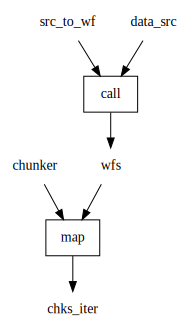

In [70]:
dag.dot_digraph()

In [79]:
func_src = {'func1':my_func1, 'func2':my_func2}
for item in mk_fnodes_from_fn_factories(fnodes_factories, func_src):
    print(item)

{'name': 'func1', 'out': 'x', 'bind': {0: 'a', 'b': 2}}


TypeError: 'dict' object is not callable

In [52]:
node_kw = {'name': 'func1', 'out': 'x', 'bind': {0: 'a', 1:'b' }}
ffact = node_kwargs_to_func_node_factory(node_kw)
ffact(my_func1)
fnodes_factories =[ffact]
#fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))

In [54]:
ffact(my_func1)

FuncNode(a,b -> func1 -> x)

In [47]:
Sig(ffact)

<Sig (func: Callable, *, name: str = 'func1', bind: dict = {0: 'a', 1: 'b'}, out: str = 'x', func_label: str = None, names_maker: Callable = <function underscore_func_node_names_maker at 0x7fde552adab0>, node_validator: Callable = <function basic_node_validator at 0x7fde55387ac0>) -> None>

In [48]:
def my_func1(a,b):
    return str(a+b)

def my_func2(x,func1,c,d):
    return d

In [49]:
ffact(func=my_func1)

FuncNode(a,b -> func1 -> x)